In [1]:
import os

# Paths to original and ELA images
real_images_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2\Au'
tampered_images_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2\Tp'
ela_real_images_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2\ELA\Au'
ela_tampered_images_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2\ELA\Tp'

# Create directories if they don't exist
os.makedirs(ela_real_images_dir, exist_ok=True)
os.makedirs(ela_tampered_images_dir, exist_ok=True)


In [3]:
from PIL import Image, ImageChops, ImageEnhance

def ela_image(path, quality=90):
    original = Image.open(path)
    resaved_path = path.split('.')[0] + '_resaved.jpg'
    original.save(resaved_path, 'JPEG', quality=quality)
    resaved = Image.open(resaved_path)
    
    ela_image = ImageChops.difference(original, resaved)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    
    if max_diff == 0:
        max_diff = 1  # Avoid division by zero
    
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


In [4]:
def generate_ela_images(input_dir, output_dir, quality=90):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                path = os.path.join(root, file)
                ela_img = ela_image(path, quality)
                ela_output_path = os.path.join(output_dir, os.path.relpath(root, input_dir), file)
                os.makedirs(os.path.dirname(ela_output_path), exist_ok=True)
                ela_img.save(ela_output_path)

# Generate ELA images for real and tampered datasets
generate_ela_images(real_images_dir, ela_real_images_dir)
generate_ela_images(tampered_images_dir, ela_tampered_images_dir)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2\ELA',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2\ELA',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 15290 images belonging to 2 classes.
Found 3821 images belonging to 2 classes.


In [2]:
import os
import shutil
import random

# Define source and destination directories
real_images_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2\Au'
tampered_images_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2\Tp'
subset_real_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2_Subset\Au'
subset_tampered_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2_Subset\Tp'

# Create directories if they don't exist
os.makedirs(subset_real_dir, exist_ok=True)
os.makedirs(subset_tampered_dir, exist_ok=True)


In [3]:
def copy_subset(input_dir, output_dir, num_images):
    all_files = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.jpg') or f.endswith('.png')]
    subset_files = random.sample(all_files, num_images)
    
    for file in subset_files:
        shutil.copy(file, output_dir)

# Copy 1500 images from each directory
copy_subset(real_images_dir, subset_real_dir, 1500)
copy_subset(tampered_images_dir, subset_tampered_dir, 1500)


In [4]:
ela_subset_real_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2_Subset\ELA\Au'
ela_subset_tampered_dir = r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2_Subset\ELA\Tp'

# Create directories if they don't exist
os.makedirs(ela_subset_real_dir, exist_ok=True)
os.makedirs(ela_subset_tampered_dir, exist_ok=True)


In [5]:
from PIL import Image, ImageChops, ImageEnhance

def ela_image(path, quality=90):
    original = Image.open(path)
    resaved_path = path.split('.')[0] + '_resaved.jpg'
    original.save(resaved_path, 'JPEG', quality=quality)
    resaved = Image.open(resaved_path)
    
    ela_image = ImageChops.difference(original, resaved)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    
    if max_diff == 0:
        max_diff = 1  # Avoid division by zero
    
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image


In [6]:
def generate_ela_images(input_dir, output_dir, quality=90):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                path = os.path.join(root, file)
                ela_img = ela_image(path, quality)
                ela_output_path = os.path.join(output_dir, os.path.relpath(root, input_dir), file)
                os.makedirs(os.path.dirname(ela_output_path), exist_ok=True)
                ela_img.save(ela_output_path)

# Generate ELA images for the subset
generate_ela_images(subset_real_dir, ela_subset_real_dir)
generate_ela_images(subset_tampered_dir, ela_subset_tampered_dir)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2_Subset\ELA',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    r'C:\Users\HP\OneDrive\Documents\dataset_iD\CASIA2_Subset\ELA',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 2400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load VGG19 model without the top classification layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)


Epoch 1/10
75/75 [==============================] - 467s 6s/step - loss: 1.0370 - accuracy: 0.6996 - val_loss: 0.4292 - val_accuracy: 0.8133
Epoch 2/10
75/75 [==============================] - 446s 6s/step - loss: 0.4864 - accuracy: 0.7792 - val_loss: 0.4040 - val_accuracy: 0.8200
Epoch 3/10
75/75 [==============================] - 442s 6s/step - loss: 0.4724 - accuracy: 0.7925 - val_loss: 0.4774 - val_accuracy: 0.7800
Epoch 4/10
75/75 [==============================] - 473s 6s/step - loss: 0.4190 - accuracy: 0.8225 - val_loss: 0.4038 - val_accuracy: 0.8217
Epoch 5/10
75/75 [==============================] - 470s 6s/step - loss: 0.3620 - accuracy: 0.8492 - val_loss: 0.4018 - val_accuracy: 0.8150
Epoch 6/10
75/75 [==============================] - 452s 6s/step - loss: 0.3647 - accuracy: 0.8471 - val_loss: 0.3876 - val_accuracy: 0.8333
Epoch 7/10
75/75 [==============================] - 459s 6s/step - loss: 0.4040 - accuracy: 0.8254 - val_loss: 0.4014 - val_accuracy: 0.8150
Epoch 8/10
75

In [9]:
validation_generator.reset()
predictions = model.predict(validation_generator)
y_pred = (predictions > 0.5).astype(int)
y_true = validation_generator.classes

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_true, y_pred))
print('ROC-AUC:', roc_auc_score(y_true, predictions))


19/19 [==============================] - 94s 5s/step
              precision    recall  f1-score   support

           0       0.50      0.42      0.45       300
           1       0.50      0.58      0.53       300

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.49       600
weighted avg       0.50      0.50      0.49       600

ROC-AUC: 0.49573888888888895


Epoch 1/10
75/75 [==============================] - 480s 6s/step - loss: 0.2818 - accuracy: 0.8867 - val_loss: 0.4066 - val_accuracy: 0.8333
Epoch 2/10
75/75 [==============================] - 987s 13s/step - loss: 0.2820 - accuracy: 0.8908 - val_loss: 0.3907 - val_accuracy: 0.8350
Epoch 3/10
75/75 [==============================] - 457s 6s/step - loss: 0.2260 - accuracy: 0.9133 - val_loss: 0.4136 - val_accuracy: 0.8300
Epoch 4/10
75/75 [==============================] - 466s 6s/step - loss: 0.2209 - accuracy: 0.9183 - val_loss: 0.4790 - val_accuracy: 0.8133
Epoch 5/10
75/75 [==============================] - 462s 6s/step - loss: 0.2029 - accuracy: 0.9179 - val_loss: 0.4214 - val_accuracy: 0.8300
Epoch 6/10
75/75 [==============================] - 502s 7s/step - loss: 0.1786 - accuracy: 0.9333 - val_loss: 0.7043 - val_accuracy: 0.7300
Epoch 7/10
75/75 [==============================] - 461s 6s/step - loss: 0.2439 - accuracy: 0.8979 - val_loss: 0.4435 - val_accuracy: 0.8167
Epoch 8/10
7

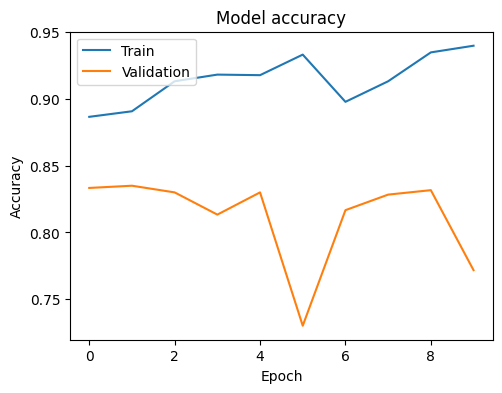

In [13]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
